Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuration
sns.set(style="whitegrid")
%matplotlib inline


Chargement des données

In [4]:
df = pd.read_csv("../data/energy_weather_paris.csv", parse_dates=["date"])
df.head()

,date,temp_moyenne,temp_min,temp_max,precipitations,neige,direction_vent,vitesse_vent,rafales_vent,pression,ensoleillement,conso_kw
0,2023-01-01,13.1,11.4,15.0,5.4,NaN,NaN,15.2,50.0,1015.0,0.0,345426.0
1,2023-01-02,10.8,7.7,14.3,2.2,NaN,NaN,11.4,46.0,1020.0,99.0,410791.0
2,2023-01-03,7.7,5.7,9.7,1.2,NaN,NaN,12.1,37.0,1028.4,182.0,449894.0
3,2023-01-04,11.8,9.9,13.6,1.2,NaN,NaN,19.0,57.0,1024.5,2.0,437677.0
4,2023-01-05,12.8,11.5,13.8,0.2,NaN,NaN,11.1,39.0,1025.0,18.0,417878.0


Préparation des données

In [5]:
# Vérifier les colonnes
df.columns
# On garde uniquement les features numériques
df_model = df.drop(columns=["date", "neige", "direction_vent"]) 
df_model = df_model.dropna()
# Séparation x/y
X = df_model.drop(columns=["conso_kw"])
y = df_model["conso_kw"]
df_model.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Modelisation

In [6]:
# Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


 Évaluation

In [7]:
def eval_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))
    print()

eval_model("Régression Linéaire", y_test, y_pred_lr)
eval_model("Random Forest", y_test, y_pred_rf)


--- Régression Linéaire ---
MAE : 36811.73504763943
RMSE: 46805.558535664444
R²  : 0.6499224847962382

--- Random Forest ---
MAE : 26870.200276243093
RMSE: 33372.55426648882
R²  : 0.8220294062072243



Visualisation

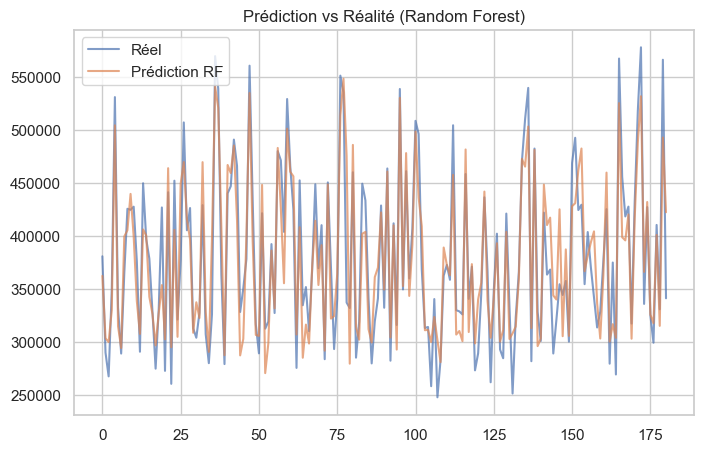

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Réel", alpha=0.7)
plt.plot(y_pred_rf, label="Prédiction RF", alpha=0.7)
plt.legend()
plt.title("Prédiction vs Réalité (Random Forest)")
plt.show()


Sauvegarde du modèle

In [ ]:
import joblib

joblib.dump(rf, "/opt/airflow/data/model.joblib")


['../models/random_forest_model.pkl']